# II.	The Visual Machinery of the human Brain

# SOBEL, LAPLACIAN, CANNY, mY_oPERATOR & COMBINED EDGES 

Using sobel, canny, laplacian, and combining all the edge extraction results I have obtained  

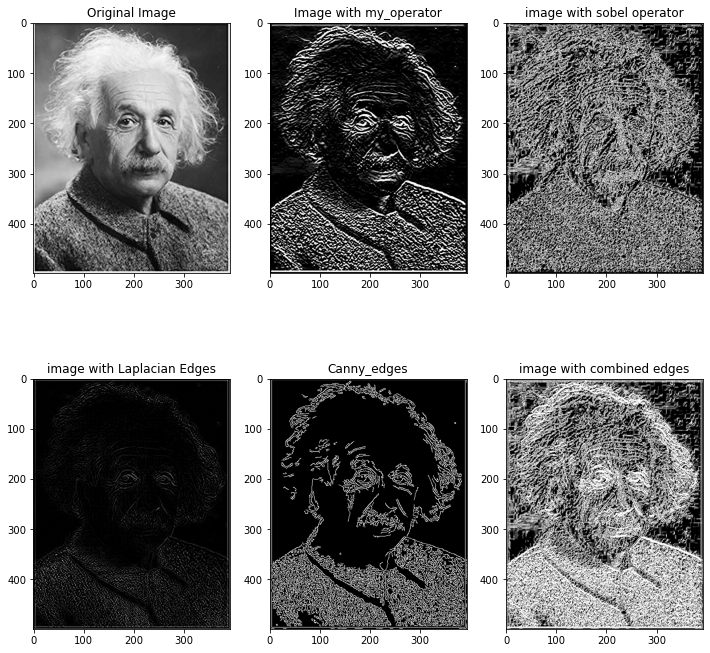

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("C:/Users/DELL/Desktop/CVS/VM of Human Brain/et.jpg",cv2.IMREAD_GRAYSCALE)


# Define Sobel operators for horizontal and vertical gradients
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1,-2,-1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]])

# Apply convolution to image using Sobel operators
grad_x = cv2.filter2D(img, -1, sobel_x)
grad_y = cv2.filter2D(img, -1, sobel_y)

# Calculate magnitude of gradient
mag = np.sqrt(grad_x**2 + grad_y**2)

# Normalize values to range between 0 and 255
sobel_edges = cv2.normalize(mag.astype('uint8'), None, 0, 255, cv2.NORM_MINMAX)

# Define edge operator
my_edge_op = np.array([[-2, -4, -2],
                    [ 0,  0,  0],
                    [ 2,  4,  2]])

# Apply convolution to image using edge operator
my_edges = cv2.filter2D(img, -1, my_edge_op)

# Apply the Canny edge detector with 8 gradient directions
edges_canny = cv2.Canny(img, 100, 200, L2gradient=True)

# Apply Laplacian edge detection
edges_laplacian = cv2.Laplacian(img, cv2.CV_8U)



# Combine the edges using edge map fusion
combined_edges = np.maximum.reduce([edges_laplacian, sobel_edges, edges_canny, my_edges])

# Combine the edges using edge map fusion
sobel_with_my_operator = np.maximum.reduce([sobel_edges, my_edges])

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,12))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(my_edges, cmap='gray')
axs[0, 1].set_title('Image with my_operator')
axs[0, 2].imshow(sobel_edges, cmap='gray')
axs[0, 2].set_title('image with sobel operator')
axs[1, 0].imshow(edges_laplacian, cmap='gray')
axs[1, 0].set_title('image with Laplacian Edges')
axs[1, 2].imshow(combined_edges, cmap='gray')
axs[1, 2].set_title('image with combined edges')
axs[1, 1].imshow(edges_canny, cmap='gray')
axs[1, 1].set_title('Canny_edges')
plt.show()






The magnitude values are normalized to range between 0 and 255 using OpenCV's normalize function. The code also defines an edge operator and applies convolution to the input image using this operator. Then, it applies the Canny edge detector with 8 gradient directions and Laplacian edge detection to the input image.



In summary, this code applies various edge detection techniques such as Sobel, Canny, and Laplacian to an input image, combines the edges using edge map fusion, and displays the results using matplotlib.






The threshold values used for Canny edge detection are 100 and 200. The cv2.Canny() function takes three arguments: the input image, the lower threshold value, and the upper threshold value. In this case, a lower threshold value of 100 and an upper threshold value of 200 have been used to determine the edges. Any edges with gradient values below the lower threshold are suppressed and considered not to be edges, while those above the upper threshold are considered to be strong edges. Edges with gradient values between the two thresholds are considered weak edges and are included in the final output only if they are connected to strong edges. 

# Contrasting the above results to the directional Kirsch operator

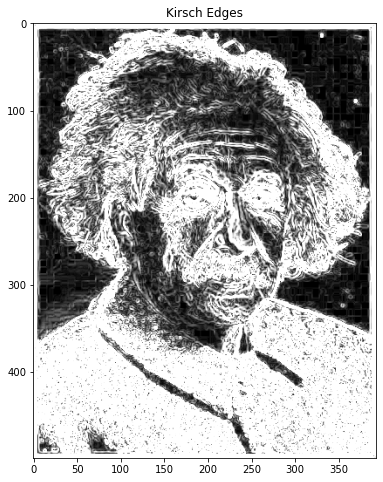

In [45]:
# Define Kirsch operators for 8 different directions
kirsch_ops = [
    np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),
    np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),
    np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
    np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),
    np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),
    np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),
    np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),
    np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
]

# Apply convolution to image using Kirsch operators
kirsch_edges = np.zeros_like(combined_edges)
for op in kirsch_ops:
    edges = cv2.filter2D(img, -1, op)
    kirsch_edges = np.maximum(kirsch_edges, edges)
    
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(kirsch_edges, cmap='gray')
ax.set_title('Kirsch Edges')
plt.show()

#  	Contrasting the above results from the kirsch operator to another edge operator called Prewitt compass operator.

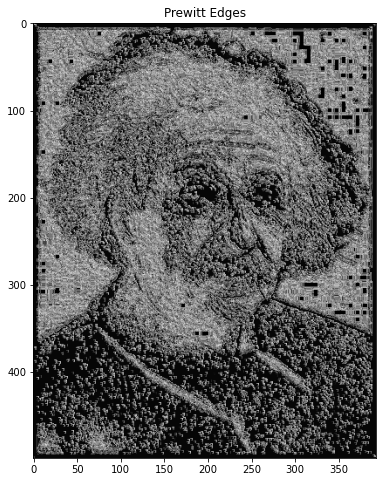

In [46]:
# Define Prewitt compass operators for 8 gradient directions
prewitt_ops = []
prewitt_ops.append(np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])) # 0 degrees
prewitt_ops.append(np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]])) # 45 degrees
prewitt_ops.append(np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])) # 90 degrees
prewitt_ops.append(np.array([[-1, -1, 0], [-1, 0, 1], [0, 1, 1]])) # 135 degrees
prewitt_ops.append(np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])) # 180 degrees
prewitt_ops.append(np.array([[-1, 0, 0], [1, 0, 0], [1, 1, 0]])) # 225 degrees
prewitt_ops.append(np.array([[1, -1, 0], [1, 0, 0], [1, 0, -1]])) # 270 degrees
prewitt_ops.append(np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])) # 315 degrees

# Apply convolution to image using Prewitt compass operators
prewitt_edges = []
for op in prewitt_ops:
    grad = cv2.filter2D(kirsch_edges, -1, op)
    prewitt_edges.append(grad)

# Calculate magnitude of gradient for each direction
prewitt_mag = np.sqrt(np.sum(np.power(prewitt_edges, 2), axis=0))

# Normalize values to range between 0 and 255
prewitt_edges = cv2.normalize(prewitt_mag.astype('uint8'), None, 0, 255, cv2.NORM_MINMAX)


fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(prewitt_edges, cmap='gray')
ax.set_title('Prewitt Edges')
plt.show()
